# Pymaceuticals Inc.
---

### Analysis

- A look at mouse weight vs tumor size over time.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_study = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])

# Display the data table for preview
full_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [27]:
# Checking the number of mice.
print(full_study["Mouse ID"].nunique())

249


In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ID = full_study[full_study.duplicated
    (["Mouse ID", "Timepoint"],
     keep =False)] 
duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
#their result: array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID.
#full_study[full_study.duplicated(["Mouse ID","Timepoint"])]
mouse_cleaned = full_study.set_index("Mouse ID")
mouse_cleaned = mouse_cleaned.drop(["g989"])
mouse_cleaned = mouse_cleaned.reset_index()
mouse_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [31]:
# Checking the number of mice in the clean DataFrame.
print(mouse_cleaned["Mouse ID"].nunique())

248


## Summary Statistics

In [32]:
# Reference/help: former class-taker Stephanie Richards
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = mouse_cleaned.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_vol_mean = pd.DataFrame(drug_groups["Tumor Volume (mm3)"].mean())
tumor_vol_median = pd.DataFrame(drug_groups["Tumor Volume (mm3)"].median())
tumor_vol_var = pd.DataFrame(drug_groups["Tumor Volume (mm3)"].var())
tumor_vol_std = pd.DataFrame(drug_groups["Tumor Volume (mm3)"].std())
tumor_vol_sem = pd.DataFrame(drug_groups["Tumor Volume (mm3)"].sem())

# Assemble the resulting series into a single summary DataFrame.
summary = tumor_vol_mean.merge(tumor_vol_median, on = "Drug Regimen", suffixes = ("_mean", "_median"))
summary = summary.merge(tumor_vol_var, on = "Drug Regimen")
summary = summary.merge(tumor_vol_std, on = "Drug Regimen", suffixes = ("_var", "_std_dev"))
summary = summary.merge(tumor_vol_sem, on = "Drug Regimen")


summary = summary.rename(columns = {"Tumor Volume (mm3)_mean" : "Mean of Tumor Volume",
                                    "Tumor Volume (mm3)_median" : "Median of Tumor Volume",
                                    "Tumor Volume (mm3)_var" : "Variance of Tumor Volume",
                                    "Tumor Volume (mm3)_std_dev" : "Standard Deviation of Tumor Volume",
                                    "Tumor Volume (mm3)__vol" : "Standard Error of the Mean of Tumor Volume"})

summary


,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [38]:
#mouse_cleaned.head()
#len(mouse_cleaned)
#print(mouse_cleaned["Mouse ID"].nunique())

248


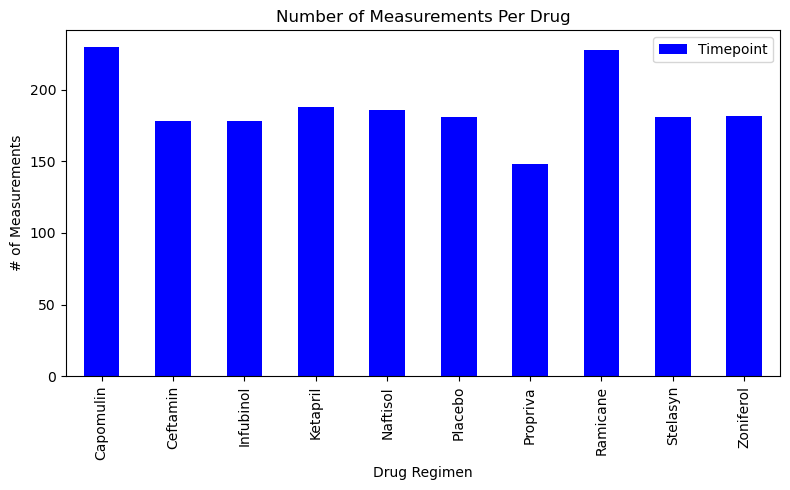

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_vs_timepoint1 = pd.DataFrame(drug_groups["Timepoint"].count().reset_index())
drug_vs_timepoint1.groupby("Drug Regimen").sum().plot(y = "Timepoint", kind = "bar",  color = "blue", rot=90, figsize = (8,5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")
plt.title("Number of Measurements Per Drug")
plt.tight_layout()
plt.show()

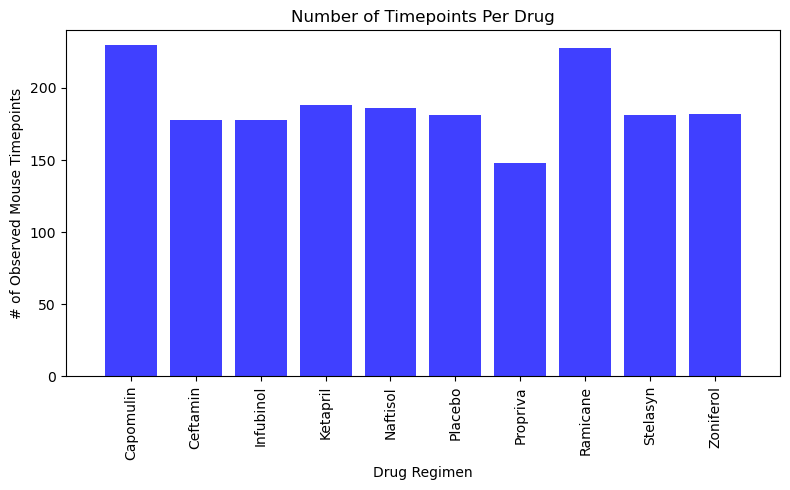

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np

drug_vs_timepoint = pd.DataFrame(drug_groups["Timepoint"].count().reset_index())
x_axis = np.arange(len(drug_vs_timepoint))
tick_locations = [value for value in x_axis]
timepoints = list(drug_vs_timepoint["Timepoint"])
plt.figure(figsize=(8,5))
plt.bar(x_axis, timepoints, color='b', alpha=0.75, align="center")
plt.xticks(tick_locations, drug_vs_timepoint["Drug Regimen"], rotation="vertical")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(drug_vs_timepoint["Timepoint"])+10)
plt.title("Number of Timepoints Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

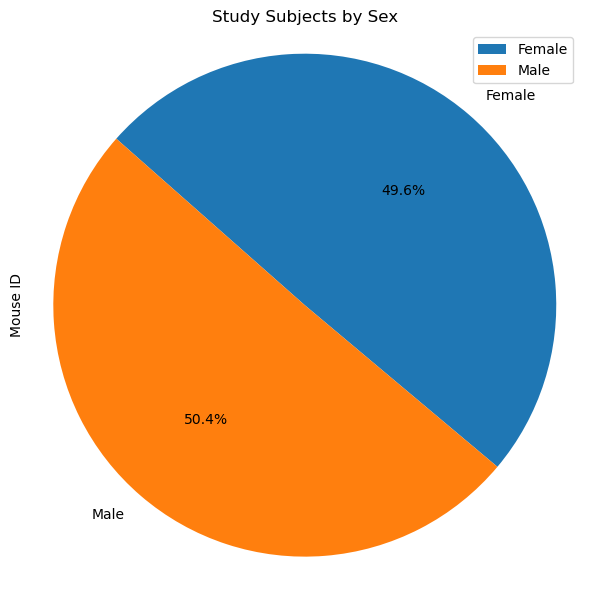

In [67]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_by_sex = mouse_cleaned[["Mouse ID", "Sex"]]

#drop dupliates
#not sure how I added this step, but why not
mouse_by_sex_percnt = mouse_by_sex.drop_duplicates(subset=["Mouse ID"], keep="first")


# Make the pie chart
mouse_by_sex_percnt = pd.DataFrame(mouse_by_sex_percnt.groupby("Sex").count())
colors = ["blue", "orange"]
mouse_by_sex_percnt.groupby(["Sex"]).sum().plot(kind='pie', y="Mouse ID", figsize=(6, 6), startangle = 320, autopct="%1.1f%%")
plt.title("Study Subjects by Sex")
plt.axis("equal")
plt.tight_layout()
plt.show()


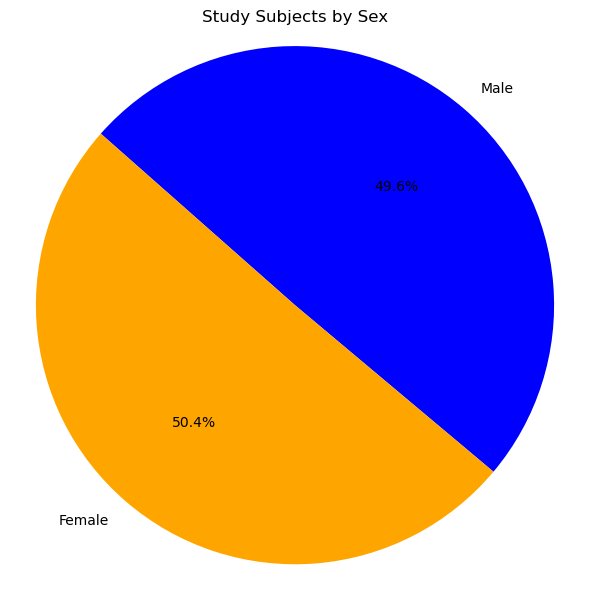

In [68]:
# Generate a pie chart, using plyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_by_sex = mouse_cleaned[["Mouse ID", "Sex"]]

#drop dupliates
#not sure how I added this step, but why not
mouse_by_sex_percnt = mouse_by_sex.drop_duplicates(subset=["Mouse ID"], keep="first")


# Make the pie chart
mouse_by_sex_percnt = pd.DataFrame(mouse_by_sex_percnt.groupby("Sex").count())
sex = mouse_by_sex_percnt.loc[:, "Mouse ID"]
colors = ["blue", "orange"]
labels = ["Male", "Female"]
plt.figure(figsize=(6,6))
plt.pie(sex, colors = colors, labels = labels, startangle = 320, autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Study Subjects by Sex")
plt.tight_layout()
plt.show()




## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Reference/help: former class-taker Stephanie Richards


# Start by getting the last (greatest) timepoint for each mouse
mouse_sorted = mouse_cleaned.sort_values(["Mouse ID", "Timepoint"], ascending=[False, False])
mouse_sorted = mouse_sorted.drop_duplicates(subset=["Mouse ID"], keep="first")


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_only = pd.DataFrame(mouse_sorted.groupby(["Drug Regimen", "Mouse ID"]).max())
four_only = four_only.reset_index()
four_only = four_only.loc[(four_only["Drug Regimen"] == "Capomulin") |
                            (four_only["Drug Regimen"] == "Ceftamin") |
                            (four_only["Drug Regimen"] == "Infubinol") | 
                            (four_only["Drug Regimen"] == "Ramicane")]
#four_only.head()

tumor_volume = pd.merge(four_only, mouse_sorted, how="inner", on = ["Mouse ID", "Timepoint"])
tumor_volume = tumor_volume[["Drug Regimen_x", "Mouse ID", "Sex_x", "Age_months_x", "Weight (g)_y", "Timepoint", 
                             "Tumor Volume (mm3)_y", "Metastatic Sites_y"]]
tumor_volume = tumor_volume.rename(columns = {"Drug Regimen_x" : "Drug Regimen", 
                                             "Sex_x" : "Sex", 
                                             "Age_months_x" : "Age in Months", 
                                             "Weight (g)_y" : "Weight (g)", 
                                            "Tumor Volume (mm3)_y" : "Tumor Volume (mm3)",
                                            "Metastatic Sites_y" : "Metatastic Sites"})
tumor_volume.head()



,Drug Regimen,Mouse ID,Sex,Age in Months,Weight (g),Timepoint,Tumor Volume (mm3),Metatastic Sites
0,Capomulin,b128,Female,9,22,45,38.982878,2
1,Capomulin,b742,Male,7,21,45,38.939633,0
2,Capomulin,f966,Male,16,17,20,30.485985,0
3,Capomulin,g288,Male,3,19,45,37.074024,1
4,Capomulin,g316,Female,22,22,45,40.159220,2


In [70]:
# I am aware I did not do the IQR and outliers as directed and did it the long way instead
# but I ran out of time to fix it, I started but never finished
# It appears I still got the right answers though!


# Put treatments into a list for for loop (and later for plot labels)
#drug_names ["Capomulin", "Ramicane", "Infubinol", and "Ceftamin"]

# Append the double of i to the list
#drug_list = [] 

#for i in range(4): 
#    drug_list.append(i * 2)  
    
 

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_data = []



In [71]:
#Capomulin
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes

drug_regimen = tumor_volume.groupby("Drug Regimen")
capomulin_only = pd.DataFrame(drug_regimen.get_group("Capomulin"))

capo_tumor_vol = list(capomulin_only["Tumor Volume (mm3)"])
capo_tumor_vol.sort()

    # add subset


    # Determine outliers using upper and lower bounds

capomulin_mean = capomulin_only["Tumor Volume (mm3)"].mean()
capomulin_lower = capomulin_only["Tumor Volume (mm3)"].quantile(q=0.25)
capomulin_upper = capomulin_only["Tumor Volume (mm3)"].quantile(q=0.75)
capomulin_iqr = capomulin_upper - capomulin_lower
capo_lower_b = capomulin_lower - (capomulin_iqr * 1.5)
capo_upper_b = (capomulin_iqr * 1.5) + capomulin_upper
capo_outlier = capomulin_only.loc[(capomulin_only["Tumor Volume (mm3)"] > capo_upper_b) | (capomulin_only["Tumor Volume (mm3)"] < capo_lower_b)]



In [72]:
#Infubinol
# Locate the rows which contain mice on each drug and get the tumor volumes


infubinol_only = pd.DataFrame(drug_regimen.get_group("Infubinol"))

infu_tumor_vol = list(infubinol_only["Tumor Volume (mm3)"])
infu_tumor_vol.sort()


    # add subset


    # Determine outliers using upper and lower bounds
infubinol_mean = infubinol_only["Tumor Volume (mm3)"].mean()
infubinol_lower = infubinol_only["Tumor Volume (mm3)"].quantile(q=0.25)
infubinol_upper = infubinol_only["Tumor Volume (mm3)"].quantile(q=0.75)
infubinol_iqr = infubinol_upper - infubinol_lower
infu_lower_b = infubinol_lower - (infubinol_iqr * 1.5)
infu_upper_b = (infubinol_iqr * 1.5) + capomulin_upper
infu_outlier = infubinol_only.loc[(infubinol_only["Tumor Volume (mm3)"] > infu_upper_b) | (infubinol_only["Tumor Volume (mm3)"] < infu_lower_b)]


In [73]:
#Ramicane"
# Locate the rows which contain mice on each drug and get the tumor volumes

ramicane_only = pd.DataFrame(drug_regimen.get_group("Ramicane"))

rami_tumor_vol = list(ramicane_only["Tumor Volume (mm3)"])
rami_tumor_vol.sort()


    # add subset


    # Determine outliers using upper and lower bounds
ramicane_mean = ramicane_only["Tumor Volume (mm3)"].mean()
ramicane_lower = ramicane_only["Tumor Volume (mm3)"].quantile(q=0.25)
ramicane_upper = ramicane_only["Tumor Volume (mm3)"].quantile(q=0.75)
ramicane_iqr = ramicane_upper - ramicane_lower
rami_lower_b = ramicane_lower - (ramicane_iqr * 1.5)
rami_upper_b = (ramicane_iqr * 1.5) + ramicane_upper
rami_outlier = ramicane_only.loc[(ramicane_only["Tumor Volume (mm3)"] > rami_upper_b) | (ramicane_only["Tumor Volume (mm3)"] < rami_lower_b)]

In [74]:
#Ceftamin
# Locate the rows which contain mice on each drug and get the tumor volumes

ceftamin_only = pd.DataFrame(drug_regimen.get_group("Ceftamin"))

ceft_tumor_vol = list(ceftamin_only["Tumor Volume (mm3)"])
ceft_tumor_vol.sort()


    # add subset


    # Determine outliers using upper and lower bounds
ceftamin_mean = ceftamin_only["Tumor Volume (mm3)"].mean()
ceftamin_lower = ceftamin_only["Tumor Volume (mm3)"].quantile(q=0.25)
ceftamin_upper = ceftamin_only["Tumor Volume (mm3)"].quantile(q=0.75)
ceftamin_iqr = ceftamin_upper - ceftamin_lower
ceft_lower_b = ceftamin_lower - (ceftamin_iqr * 1.5)
ceft_upper_b = (ceftamin_iqr * 1.5) + ceftamin_upper
ceft_outlier = ceftamin_only.loc[(ceftamin_only["Tumor Volume (mm3)"] > ceft_upper_b) | (ceftamin_only["Tumor Volume (mm3)"] < ceft_lower_b)]


In [75]:
print("Capomulin Data:")
print(f"A search for outliers produced {len(capo_outlier)}. The mean is {capomulin_mean}.")
print("Infubinol Data:")
print(f"A search for outliers produced {len(infu_outlier)}. The mean in {infubinol_mean}")
print("Ramicane Data:")
print(f"A search for outliers produced {len(rami_outlier)}. The mean in {ramicane_mean}")
print("Ceftamin Data:")
print(f"A search for outliers produced {len(ceft_outlier)}. The mean in {ceftamin_mean}")

Capomulin Data:
A search for outliers produced 0. The mean is 36.6675677192.
Infubinol Data:
A search for outliers produced 15. The mean in 58.1782457852
Ramicane Data:
A search for outliers produced 0. The mean in 36.1913904284
Ceftamin Data:
A search for outliers produced 0. The mean in 57.753976825200006


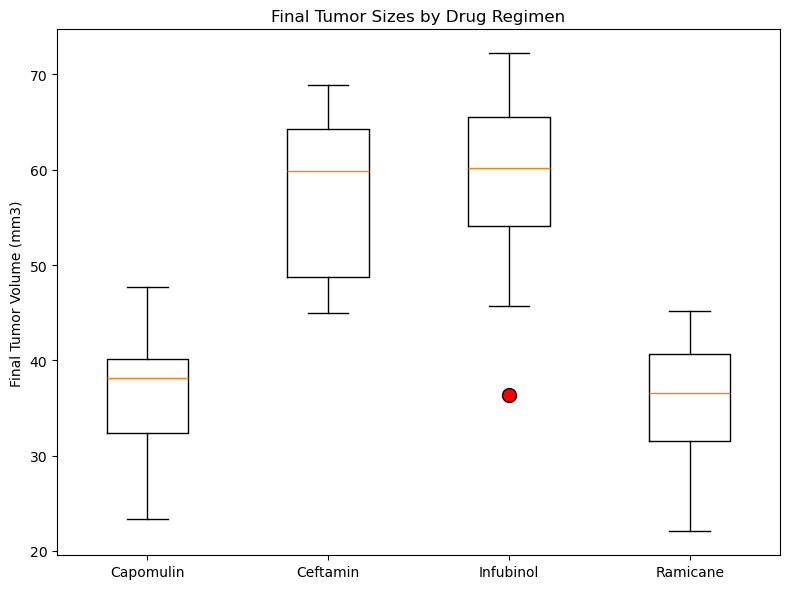

In [76]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

tumor_comparison = list(zip(capo_tumor_vol, ceft_tumor_vol, infu_tumor_vol, rami_tumor_vol))
tumor_data = pd.DataFrame(tumor_comparison, columns = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])


data = tumor_data["Capomulin"], tumor_data["Ceftamin"], tumor_data["Infubinol"], tumor_data["Ramicane"]
labels = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  linestyle='none')
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("Final Tumor Sizes by Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(data, labels = labels, flierprops = flierprops)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [78]:
#List of Capomulin Mice
mouse_by_drug_tp = mouse_cleaned[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]
#capomulin_only = mouse_by_drug_tp.loc[mouse_by_drug_tp["Drug Regimen"] == "Capomulin"] 
capomulin_only

,Drug Regimen,Mouse ID,Sex,Age in Months,Weight (g),Timepoint,Tumor Volume (mm3),Metatastic Sites
0,Capomulin,b128,Female,9,22,45,38.982878,2
1,Capomulin,b742,Male,7,21,45,38.939633,0
2,Capomulin,f966,Male,16,17,20,30.485985,0
3,Capomulin,g288,Male,3,19,45,37.074024,1
4,Capomulin,g316,Female,22,22,45,40.159220,2
5,Capomulin,i557,Female,1,24,45,47.685963,1
6,Capomulin,i738,Female,23,20,45,37.311846,2
7,Capomulin,j119,Female,7,23,45,38.125164,1
8,Capomulin,j246,Female,21,21,35,38.753265,1
9,Capomulin,l509,Male,17,21,45,41.483008,3


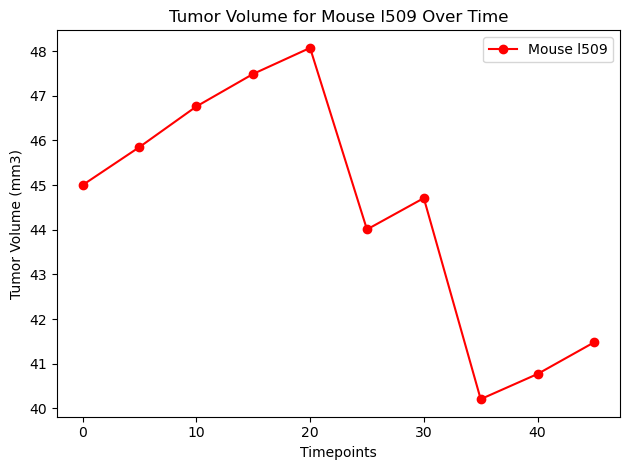

In [79]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = mouse_cleaned.loc[mouse_cleaned["Mouse ID"] == "l509"]
x_axis = np.arange(0, 50, 5)

y_axis = list(mouse_l509["Tumor Volume (mm3)"])


plt.plot(x_axis, y_axis, marker = "o", color="red", label = "Mouse l509")
plt.title("Tumor Volume for Mouse l509 Over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

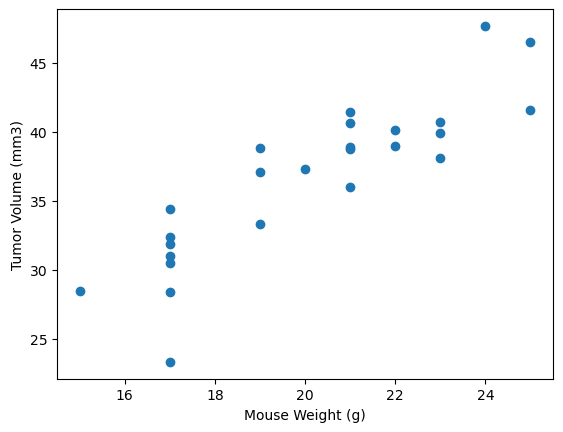

In [80]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


x_values = capomulin_only["Weight (g)"]
y_values = capomulin_only["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

In [81]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capo_corr = st.pearsonr(capomulin_only["Weight (g)"], capomulin_only["Tumor Volume (mm3)"])
print(f"The correlation between weight and tumor volume is {round(capo_corr[0],2)}")


The correlation between weight and tumor volume is 0.88


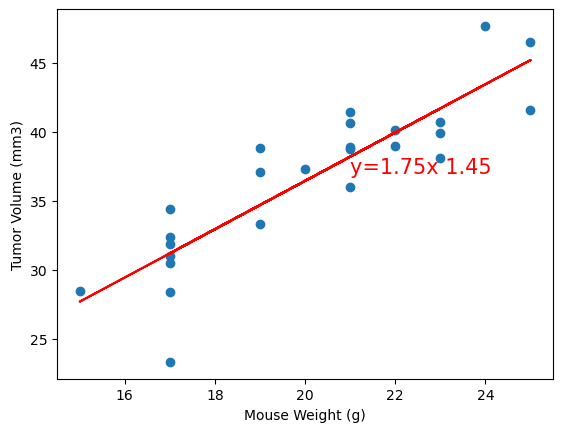

In [82]:
x_values = capomulin_only["Weight (g)"]
y_values = capomulin_only["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (21,37), fontsize=15, color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()